In [0]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras import backend as K
import matplotlib.pyplot as plt

In [0]:
#Data loaded from mnist dataset available in Keras
num_classes=10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [0]:
def train_model(layers = 1, hidden_layer_width =512, 
                activation_fn = 'sigmoid', epochs = 10, 
                dropout = False, dropout_factor = 0.2, regularisation = 0.0,
                batch_size = 128, l2_reg = 0.0,
                no_of_kernels = 32, kernel_size = (3,3), dense_layer = False):

  model = Sequential()
  model.add(Conv2D(no_of_kernels, kernel_size=kernel_size,
                    activation = activation_fn,
                    input_shape = input_shape, kernel_regularizer = l2(l2_reg)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  if layers >= 2:
    model.add(Conv2D(64, kernel_size, activation = activation_fn, 
                     kernel_regularizer=l2(l2_reg)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

  if dropout:
    model.add(Dropout(dropout_factor))
  model.add(Flatten())

  if dense_layer:
    model.add(Dense(hidden_layer_width, activation = activation_fn))
    if dropout:
      model.add(Dropout(dropout_factor))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

  history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split = 0.1)
  
  score = model.evaluate(x_test, y_test, verbose=0)
  return history,score

In [0]:
def print_plot(histories, title, xlabel, ylabel, legend, 
               print_train = False, print_loss = False):
  
  for history in histories:
    if print_train:
      plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
  plt.title(title)
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(legend, loc='best')
  plt.show()
  
  if print_loss:
    for history in histories:
      if print_train:
        plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(legend, loc='best')
    plt.show() 
    
  pass

In [0]:
# Base Configuration
number_of_hidden_layers = 1
hidden_layer_width =128 
activation_fn = 'relu'
epochs =10
batch_size = 128
no_of_kernels = 32 
kernel_size = (3,3)

In [0]:
history, score = train_model(layers=number_of_hidden_layers, 
                             hidden_layer_width=hidden_layer_width, 
                             activation_fn=activation_fn, 
                             batch_size=batch_size, 
                             epochs=epochs,
                             kernel_size=kernel_size,
                             no_of_kernels=no_of_kernels,)

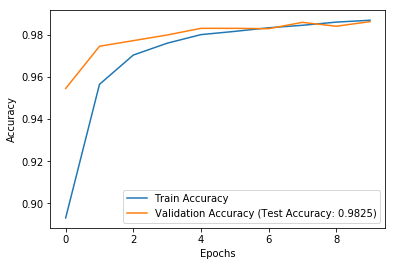

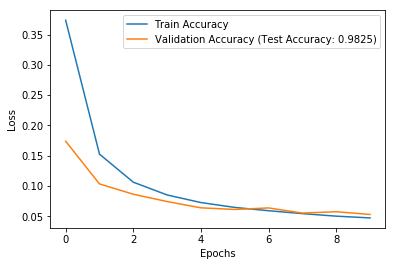

In [0]:
print_plot([history], "", 
          "Epochs", "Accuracy", 
           ["Train Accuracy", 
            "Validation Accuracy (Test Accuracy: {})".format(score[1])],
            True, True)

In [0]:
history, score = train_model(layers=number_of_hidden_layers, 
                             hidden_layer_width=hidden_layer_width, 
                             activation_fn=activation_fn, 
                             batch_size=batch_size, 
                             epochs=epochs,
                             kernel_size=kernel_size,
                             no_of_kernels=no_of_kernels, dropout=True)

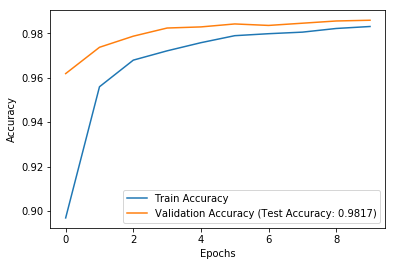

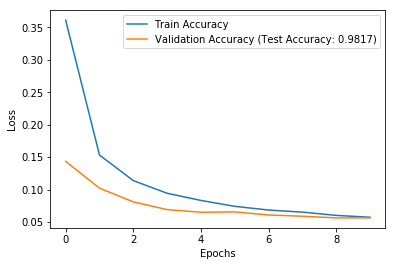

In [0]:
print_plot([history], "", 
          "Epochs", "Accuracy", 
           ["Train Accuracy", 
            "Validation Accuracy (Test Accuracy: {})".format(score[1])],
            True, True)

In [0]:
history, score = train_model(layers=number_of_hidden_layers, 
                             hidden_layer_width=hidden_layer_width, 
                             activation_fn=activation_fn, 
                             batch_size=batch_size, 
                             epochs=epochs,
                             kernel_size=kernel_size,
                             no_of_kernels=no_of_kernels, l2_reg=0.001)

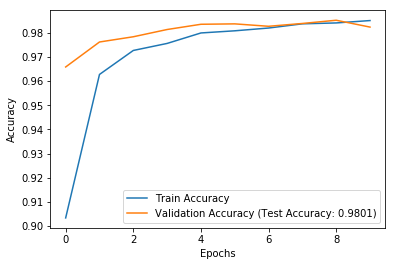

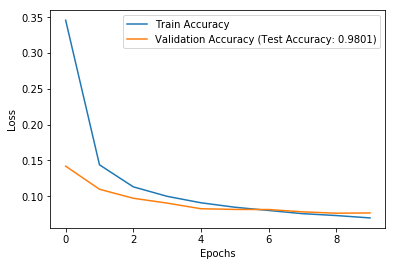

In [0]:
print_plot([history], "", 
          "Epochs", "Accuracy", 
           ["Train Accuracy", 
            "Validation Accuracy (Test Accuracy: {})".format(score[1])],
            True, True)

In [0]:
#variation in layers
history=[]
label=[]

[h,s]=train_model(layers=1, 
                  hidden_layer_width=hidden_layer_width, 
                  activation_fn=activation_fn, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  kernel_size=kernel_size,
                  no_of_kernels=no_of_kernels,)
history.append(h)   
label.append("No of Hidden Layers {} (Test Accuracy: {})".format(1,s[1]))

[h,s]=train_model(layers=2, 
                  hidden_layer_width=hidden_layer_width, 
                  activation_fn=activation_fn, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  kernel_size=kernel_size,
                  no_of_kernels=no_of_kernels,)
history.append(h)   
label.append("No of Hidden Layers {} (Test Accuracy: {})".format(2,s[1]))

[h,s]=train_model(layers=3, 
                  hidden_layer_width=hidden_layer_width, 
                  activation_fn=activation_fn, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  kernel_size=kernel_size,
                  no_of_kernels=no_of_kernels, dense_layer=True)

history.append(h)   
label.append("No of Hidden Layers {} (Test Accuracy: {})".format(3,s[1]))


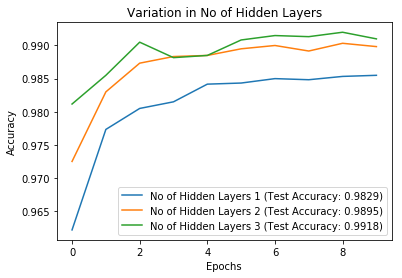

In [0]:
print_plot(history,"Variation in No of Hidden Layers","Epochs","Accuracy",label)

In [0]:
#variation in Activation Func
history=[]
label=[]

for i in ['sigmoid','tanh','relu']:
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    activation_fn=i, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    kernel_size=kernel_size,
                    no_of_kernels=no_of_kernels,)
  history.append(h)   
  label.append("Activation Function {} (Test Accuracy: {})".format(i,s[1]))


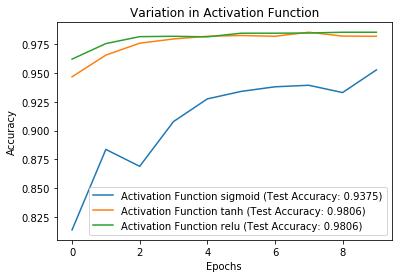

In [0]:
print_plot(history,"Variation in Activation Function","Epochs","Accuracy",label)

In [0]:
#Variation in epochs
history=[]
label=[]

for i in range(10,41,10):
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    activation_fn=activation_fn, 
                    batch_size=batch_size, 
                    epochs=i,
                    kernel_size=kernel_size,
                    no_of_kernels=no_of_kernels,)
  history.append(h)   
  label.append("Epochs {} (Test Accuracy: {})".format(i,s[1]))


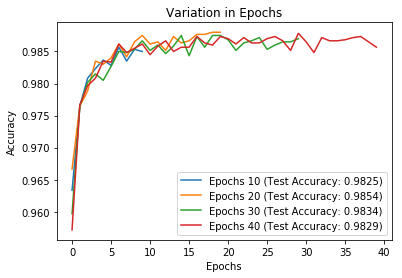

In [0]:
print_plot(history,"Variation in Epochs","Epochs","Accuracy",label)

In [0]:
  #Variation in Batch Size
  history=[]
  label=[]
  
  i=128
  while i<1025:
    [h,s]=train_model(layers=number_of_hidden_layers, 
                      hidden_layer_width=hidden_layer_width, 
                      activation_fn=activation_fn, 
                      batch_size=i, 
                      epochs=epochs,
                      kernel_size=kernel_size,
                      no_of_kernels=no_of_kernels,)
    history.append(h)   
    label.append("Batch Size {} (Test Accuracy: {})".format(i,s[1]))
    i*=2
    

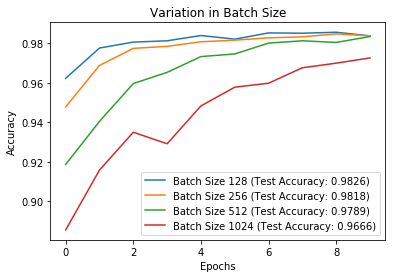

In [0]:

print_plot(history,"Variation in Batch Size","Epochs","Accuracy",label)

In [0]:
#Variation in kernel size
history=[]
label=[]

for i in [(3,3), (4,4), (5,5)]:
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    activation_fn=activation_fn, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    kernel_size=i,
                    no_of_kernels=no_of_kernels)
  history.append(h)   
  label.append("Kernel Size {} (Test Accuracy: {})".format(i,s[1]))


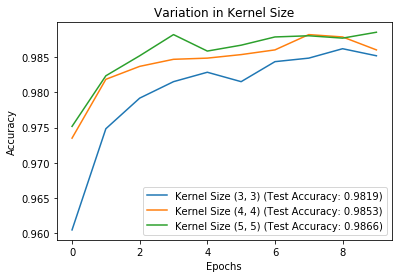

In [0]:
print_plot(history,"Variation in Kernel Size","Epochs","Accuracy",label)

In [0]:
#Variation in no. of kernels
history=[]
label=[]

for i in [16, 32, 64]:
  [h,s]=train_model(layers=number_of_hidden_layers, 
                    hidden_layer_width=hidden_layer_width, 
                    activation_fn=activation_fn, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    kernel_size=kernel_size,
                    no_of_kernels=i)
  history.append(h)   
  label.append("No. of Kernels {} (Test Accuracy: {})".format(i,s[1]))


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 84us/step - loss: 0.3690 - acc: 0.8958 - val_loss: 0.1569 - val_acc: 0.9583
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.1461 - acc: 0.9580 - val_loss: 0.1054 - val_acc: 0.9735
Epoch 3/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.1065 - acc: 0.9697 - val_loss: 0.0934 - val_acc: 0.9747
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0876 - acc: 0.9748 - val_loss: 0.0759 - val_acc: 0.9800
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0759 - acc: 0.9784 - val_loss: 0.0683 - val_acc: 0.9820
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0686 - acc: 0.9803 - val_loss: 0.0645 - val_acc: 0.9828
Epoch 7/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0628 - acc: 0.9820 - val_loss: 0.0598 - val_acc:

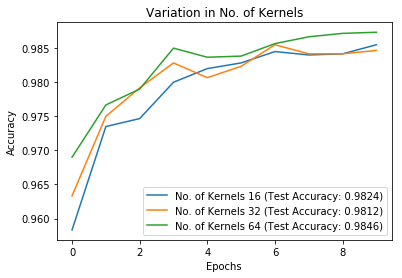

In [0]:
#@title
print_plot(history,"Variation in No. of Kernels","Epochs","Accuracy",label)